# Machine Learning Approach

## Setup

In [ ]:
from graphs import *

## Graph Definition

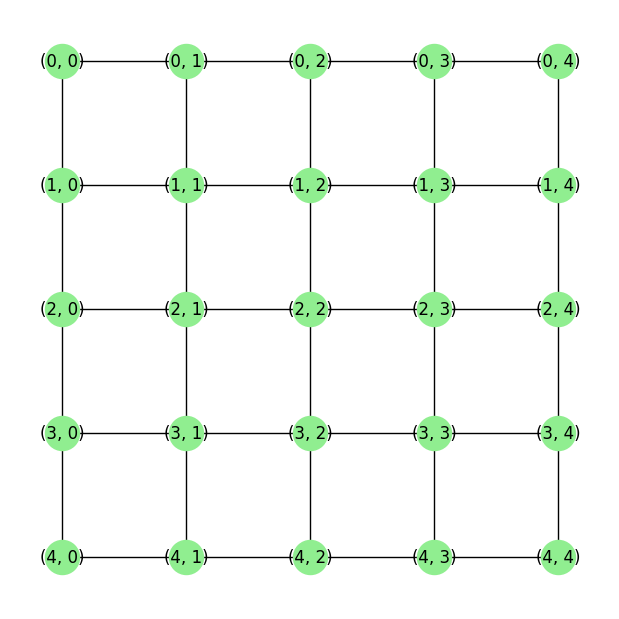

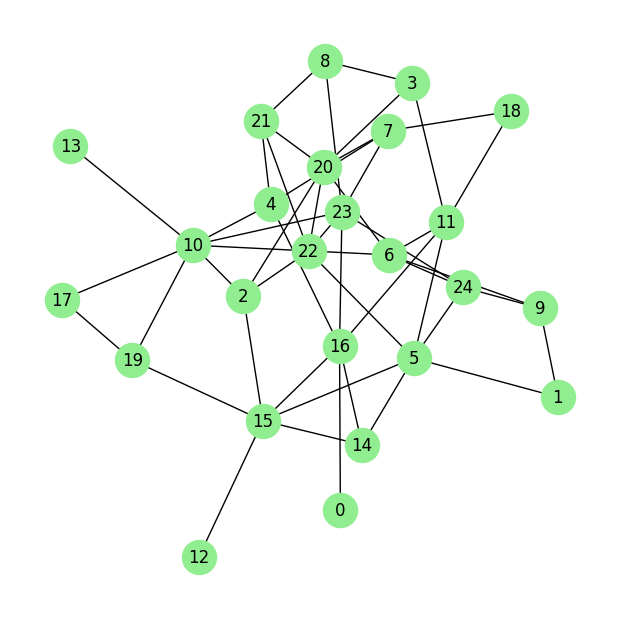

Generating graphs: 100%|██████████| 10000/10000 [00:01<00:00, 7585.12it/s]

Average degree over 10000 trials: 5.00


In [9]:
# Create a 2D grid graph using the custom function
G_2d = generate_2D_grid_graph(5, 5)
plot_graph(G_2d, 'grid')

# Create an Erdos-Renyi random graph with average degree 5 (for example)
G_er = generate_random_graph_with_avg_degree(25, 5)
plot_graph(G_er)

num_trials = 10000
degrees = []

for _ in tqdm(range(num_trials), desc="Generating graphs"):
    G_tmp = generate_random_graph_with_avg_degree(25, 5)
    avg_deg = sum(dict(G_tmp.degree()).values()) / G_tmp.number_of_nodes()
    degrees.append(avg_deg)

print(f"Average degree over {num_trials} trials: {sum(degrees)/len(degrees):.2f}")

## ML Setup

Iteration 1, loss = 18.00334780
Iteration 2, loss = 17.44112539
Iteration 3, loss = 16.98986215
Iteration 4, loss = 16.60606748
Iteration 5, loss = 16.26619130
Iteration 6, loss = 15.94836518
Iteration 7, loss = 15.63949023
Iteration 8, loss = 15.33871244
Iteration 9, loss = 15.04464008
Iteration 10, loss = 14.75129126
Iteration 11, loss = 14.46033033
Iteration 12, loss = 14.17600593
Iteration 13, loss = 13.89094927
Iteration 14, loss = 13.60488848
Iteration 15, loss = 13.31715213
Iteration 16, loss = 13.02634874
Iteration 17, loss = 12.73681092
Iteration 18, loss = 12.44965529
Iteration 19, loss = 12.16713459
Iteration 20, loss = 11.88591141
Iteration 21, loss = 11.60657783
Iteration 22, loss = 11.32668563
Iteration 23, loss = 11.04602666
Iteration 24, loss = 10.76447039
Iteration 25, loss = 10.48352113
Iteration 26, loss = 10.20000870
Iteration 27, loss = 9.91443973
Iteration 28, loss = 9.62835444
Iteration 29, loss = 9.34463886
Iteration 30, loss = 9.06174203
Iteration 31, loss = 8.

c:\Users\there\Downloads\Coding\MCDS_github\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


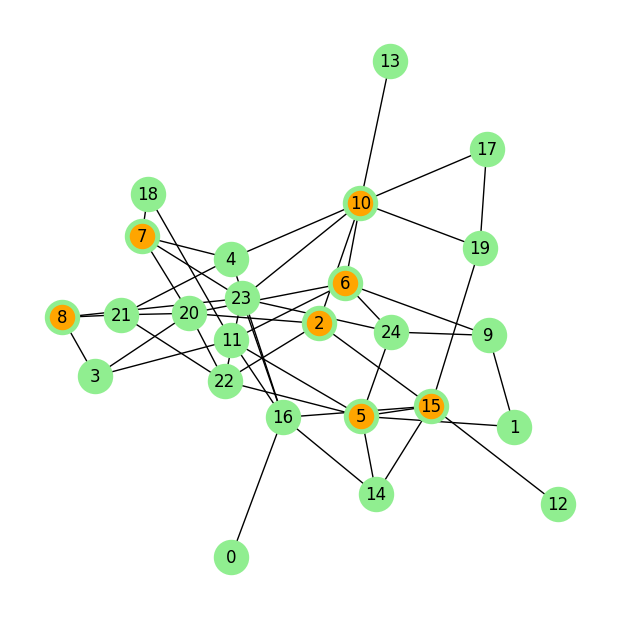

Iteration 1, loss = 18.00657144
Iteration 2, loss = 17.43119959
Iteration 3, loss = 16.99002602
Iteration 4, loss = 16.62904176
Iteration 5, loss = 16.32058364
Iteration 6, loss = 16.03795610
Iteration 7, loss = 15.76532352
Iteration 8, loss = 15.49252490
Iteration 9, loss = 15.21640689
Iteration 10, loss = 14.94143464
Iteration 11, loss = 14.67041038
Iteration 12, loss = 14.40173185
Iteration 13, loss = 14.13193167
Iteration 14, loss = 13.85974830
Iteration 15, loss = 13.58704853
Iteration 16, loss = 13.31460687
Iteration 17, loss = 13.04289261
Iteration 18, loss = 12.77229925
Iteration 19, loss = 12.50233264
Iteration 20, loss = 12.23157794
Iteration 21, loss = 11.96356842
Iteration 22, loss = 11.69771591
Iteration 23, loss = 11.42885303
Iteration 24, loss = 11.15839084
Iteration 25, loss = 10.88653316
Iteration 26, loss = 10.61678398
Iteration 27, loss = 10.34532454
Iteration 28, loss = 10.07239727
Iteration 29, loss = 9.80058520
Iteration 30, loss = 9.53068569
Iteration 31, loss = 

c:\Users\there\Downloads\Coding\MCDS_github\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


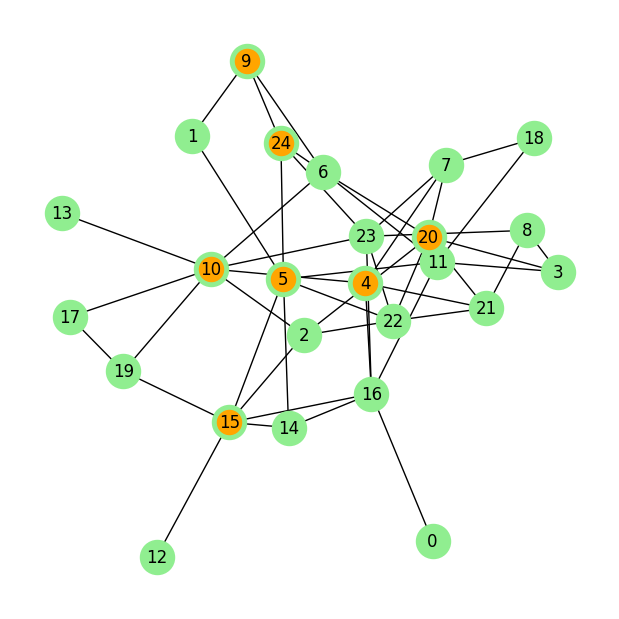

Predicted MCDS size (2D grid): 3
[(0, 1), (0, 2), (3, 3)]


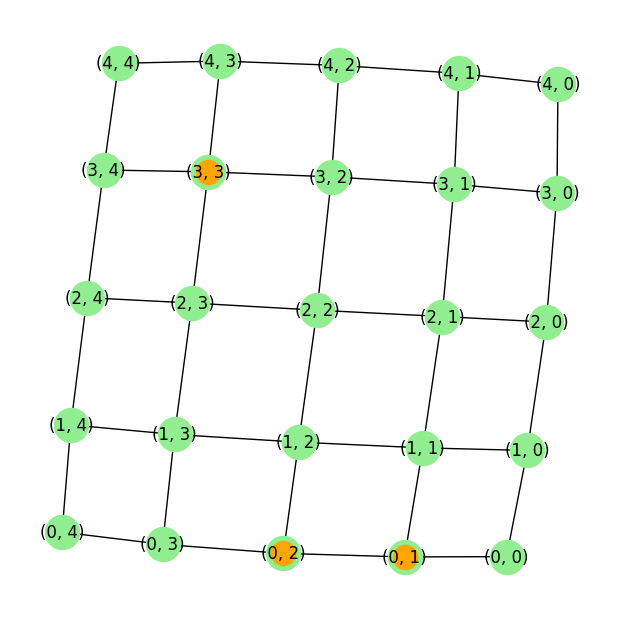

In [15]:
# --- Place this in the "## ML Setup" cell ---

import numpy as np
from sklearn.neural_network import MLPClassifier

# Helper: Convert graph to adjacency matrix (flattened)
def graph_to_features(G):
    adj = nx.to_numpy_array(G)
    return adj.flatten()

# Generate training data
def generate_training_data(num_graphs=100, n_nodes=25, avg_deg=5):
    X = []
    y = []
    for _ in range(num_graphs):
        G = generate_random_graph_with_avg_degree(n_nodes, avg_deg)
        features = graph_to_features(G)
        # Use NetworkX approximation as "ground truth" for MCDS
        mcds = nx.algorithms.approximation.min_weighted_dominating_set(G)
        label = np.zeros(n_nodes)
        node_list = list(G.nodes())
        for node in mcds:
            idx = node_list.index(node)
            label[idx] = 1
        X.append(features)
        y.append(label)
    return np.array(X), np.array(y)

# Prepare data
X_train, y_train = generate_training_data(num_graphs=100, n_nodes=25, avg_deg=5)

# Train a simple MLP to predict MCDS membership for each node
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=100, verbose=True)
mlp.fit(X_train, y_train)

# --- Inference: Predict MCDS for G_er ---
features = graph_to_features(G_er).reshape(1, -1)
pred = mlp.predict(features)[0]
node_list = list(G_er.nodes())
predicted_mcds = [node_list[i] for i, val in enumerate(pred) if val > 0.5]

print(f"Predicted MCDS size: {len(predicted_mcds)}")
overlay_subset(G_er, predicted_mcds)

# Prepare data
X_train, y_train = generate_training_data(num_graphs=100, n_nodes=25, avg_deg=5)

# Train a simple MLP to predict MCDS membership for each node
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=100, verbose=True)
mlp.fit(X_train, y_train)

# --- Inference: Predict MCDS for G_er ---
features = graph_to_features(G_er).reshape(1, -1)
pred = mlp.predict(features)[0]
node_list = list(G_er.nodes())
predicted_mcds = [node_list[i] for i, val in enumerate(pred) if val > 0.5]

print(f"Predicted MCDS size (Erdos-Renyi): {len(predicted_mcds)}")
overlay_subset(G_er, predicted_mcds)

# --- Inference: Predict MCDS for G_2d ---
features_2d = graph_to_features(G_2d).reshape(1, -1)
pred_2d = mlp.predict(features_2d)[0]
node_list_2d = list(G_2d.nodes())
predicted_mcds_2d = [node_list_2d[i] for i, val in enumerate(pred_2d) if val > 0.5]

print(f"Predicted MCDS size (2D grid): {len(predicted_mcds_2d)}")
overlay_subset(G_2d, predicted_mcds_2d)

## Finding MCDS